Directions from Start to End:
down -> right -> down -> right -> up -> right -> up -> right -> right -> down -> left -> down -> down -> down -> right -> down


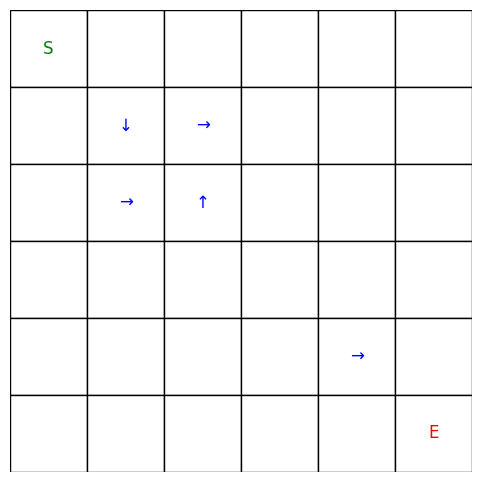

['left', 'down', 'right', 'down', 'right', 'up', 'right', 'up', 'right', 'right', 'down', 'left', 'down', 'down', 'down', 'right', 'down', 'right']
[6, 0, 0, 6, 5, 3]
[12, 3, 6, 9, 6, 9]
[0, 12, 9, 0, 10, 0]
[0, 0, 0, 0, 10, 0]
[0, 0, 0, 0, 12, 3]
[0, 0, 0, 0, 0, 12]


In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Define movement directions
DIRECTIONS = {
    'right': (0, 1, '→'),
    'down': (1, 0, '↓'),
    'left': (0, -1, '←'),
    'up': (-1, 0, '↑')
}

def generate_random_path(n):
    """Generates a randomized path from the top-left to the bottom-right of an n x n grid."""
    while True:
        grid = [[None for _ in range(n)] for _ in range(n)]  # Empty grid
        x, y = 0, 0  # Start at the top-left corner
        grid[x][y] = 'start'
        path_directions = []  # Store directions for printing
        direction_map = {}  # Map for visualization arrows

        while (x, y) != (n - 1, n - 1):
            valid_moves = []
            for direction, (dx, dy, arrow) in DIRECTIONS.items():
                nx, ny = x + dx, y + dy
                if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] is None:
                    valid_moves.append((direction, nx, ny, arrow))

            if not valid_moves:
                break  # If stuck, restart path generation

            # Randomly select a valid move
            direction, x_next, y_next, arrow = random.choice(valid_moves)
            path_directions.append(direction)  # Store direction for printing
            direction_map[(x, y)] = arrow  # Record arrow for visualization
            x, y = x_next, y_next
            grid[x][y] = 'path'

        # Check if the path reached the target
        if (x, y) == (n - 1, n - 1):
            grid[n - 1][n - 1] = 'end'  # Mark the bottom-right as the end
            return grid, direction_map, path_directions

def visualize_random_path(grid, direction_map):
    """Visualizes a grid with a randomized path and directions using matplotlib."""
    n = len(grid)
    fig, ax = plt.subplots(figsize=(n, n))
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)

    for y in range(n):
        for x in range(n):
            cell = grid[y][x]
            rect = patches.Rectangle((x, n - y - 1), 1, 1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            cx, cy = x + 0.5, n - y - 0.5
            if cell == 'start':
                ax.text(cx, cy, 'S', color='green', ha='center', va='center', fontsize=12)
            elif cell == 'end':
                ax.text(cx, cy, 'E', color='red', ha='center', va='center', fontsize=12)
            elif cell == 'path' and (x, y) in direction_map:
                arrow = direction_map[(x, y)]
                ax.text(cx, cy, arrow, color='blue', ha='center', va='center', fontsize=12)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Example usage
n = 6
grid, direction_map, path_directions = generate_random_path(n)

# Print the directions
print("Directions from Start to End:")
print(" -> ".join(path_directions))

visualize_random_path(grid, direction_map)


tiles_map = {("right","right"):5,
             ("right","down"):3,
             ("right","up"):9,

             ("down","right"):12,
             ("down","down"):10,
             ("down","left"):9,

             ("left","down"):6,
             ("left","left"):5,
             ("left","up"):12,

             ("up","right"):6,
             ("up","left"):3,
             ("up","up"):10}

#insert right at the start of the path_directions and left at the end of the path_directions
path_directions.insert(0,"left")
path_directions.append("right")

print(path_directions)

init_pos=(0,0)

#define a grid of size 6x6
grid = [[0 for _ in range(6)] for _ in range(6)]

for i in range(1,len(path_directions)):
    grid[init_pos[0]][init_pos[1]]=tiles_map[(path_directions[i-1],path_directions[i])]
    if path_directions[i]=="right":
        init_pos=(init_pos[0],init_pos[1]+1)
    elif path_directions[i]=="down":
        init_pos=(init_pos[0]+1,init_pos[1])
    elif path_directions[i]=="left":
        init_pos=(init_pos[0],init_pos[1]-1)
    elif path_directions[i]=="up":
        init_pos=(init_pos[0]-1,init_pos[1])


for i in range(6):
    print(grid[i])


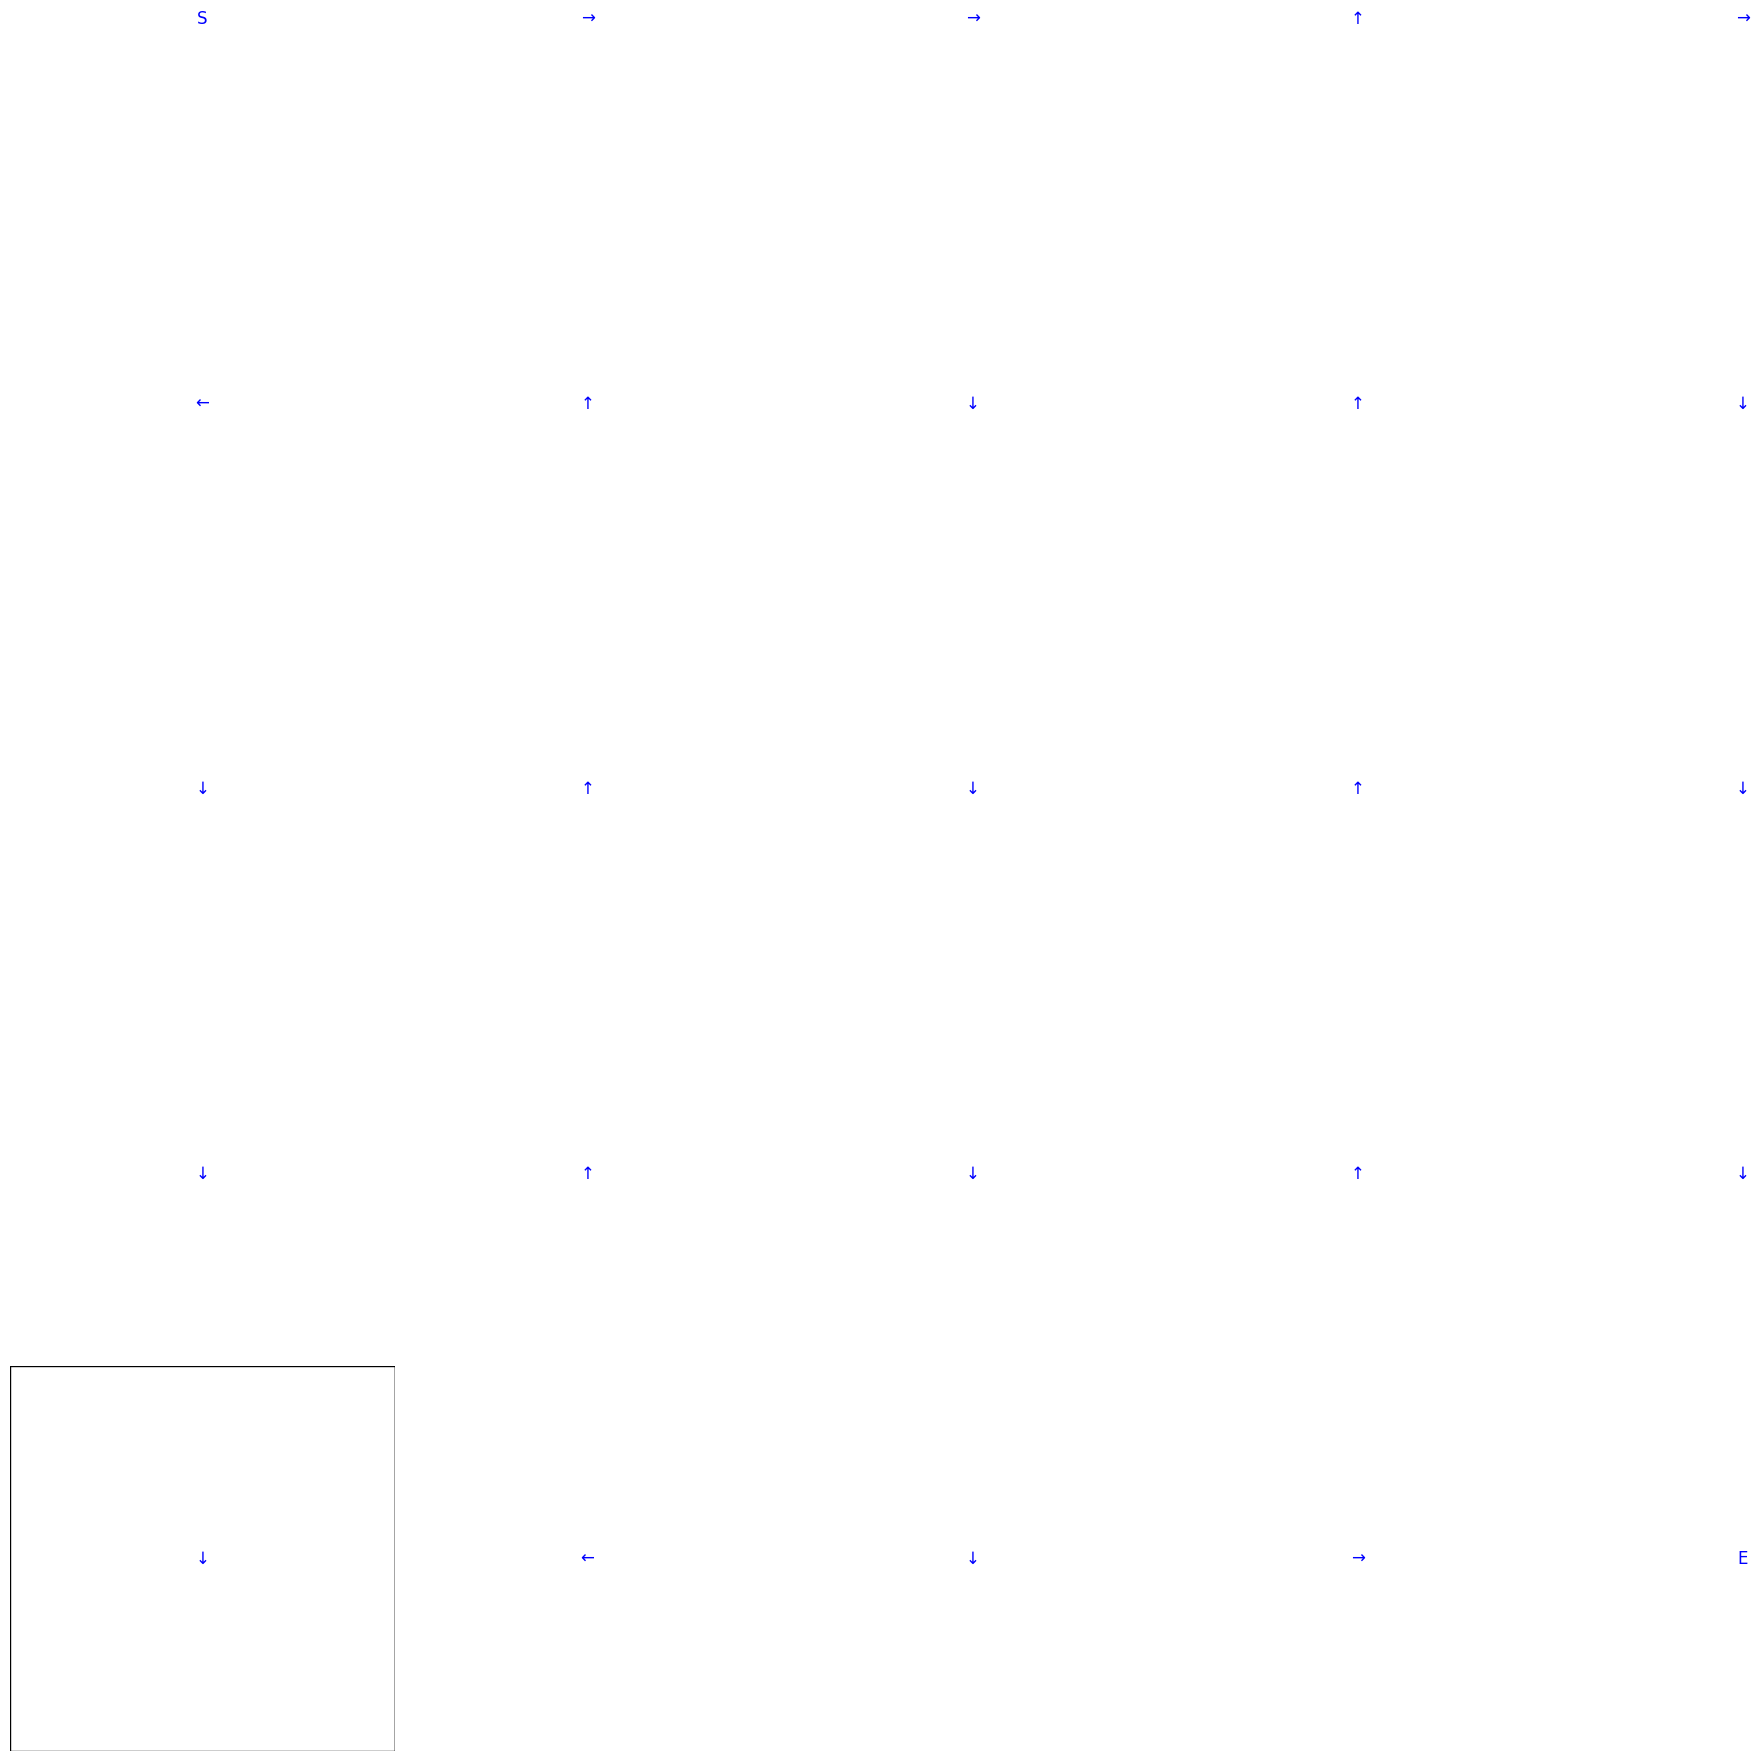

['EMPTY', 'Straight_EW', 'Straight_NS', 'Straight_EW', 'Straight_NS']
['Straight_NS', 'EMPTY', 'Straight_NS', 'EMPTY', 'Straight_NS']
['Straight_NS', 'EMPTY', 'Straight_NS', 'EMPTY', 'Straight_NS']
['Straight_NS', 'EMPTY', 'Straight_NS', 'EMPTY', 'EMPTY']
['EMPTY', 'EMPTY', 'EMPTY', 'EMPTY', 'EMPTY']


In [2]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Direction mappings
directions = ['right', 'down', 'left', 'up']
opposites = {'right': 'left', 'down': 'up', 'left': 'right', 'up': 'down'}

# Define the tiles for each direction
tile_types = {
    ('right',): 'Straight_EW',   # Tile type for a straight line horizontally
    ('down',): 'Straight_NS',    # Tile type for a straight line vertically
    ('right', 'down'): 'Corner_NW',  # Corner turning right and down
    ('down', 'left'): 'Corner_NE',  # Corner turning down and left
    ('left', 'up'): 'Corner_SE',   # Corner turning left and up
    ('up', 'right'): 'Corner_SW',  # Corner turning up and right
    ('right', 'down', 'left'): 'T_NEW',  # T-shape with right, down, and left
    ('down', 'left', 'up'): 'T_NSW',   # T-shape with down, left, and up
    ('right', 'down', 'up'): 'T_SEW',   # T-shape with right, down, and up
    ('left', 'right', 'down', 'up'): 'Cross'  # Cross intersection
}

def generate_path(n):
    # Create an empty grid with all cells initialized to None
    grid = [['' for _ in range(n)] for _ in range(n)]
    
    # Start from the top-left corner
    x, y = 0, 0
    grid[x][y] = 'S'  # Start point
    directions_stack = []
    visited = set()
    
    # The goal is to create a random path to the bottom-right corner
    while (x, y) != (n-1, n-1):
        visited.add((x, y))
        possible_directions = []

        if x < n-1 and (x+1, y) not in visited:
            possible_directions.append('down')
        if y < n-1 and (x, y+1) not in visited:
            possible_directions.append('right')
        if x > 0 and (x-1, y) not in visited:
            possible_directions.append('up')
        if y > 0 and (x, y-1) not in visited:
            possible_directions.append('left')

        # If there are no valid directions left, backtrack
        if not possible_directions:
            x, y = directions_stack.pop()
            continue
        
        # Randomly choose a direction and move in that direction
        direction = random.choice(possible_directions)
        directions_stack.append((x, y))
        
        if direction == 'right':
            y += 1
        elif direction == 'down':
            x += 1
        elif direction == 'left':
            y -= 1
        elif direction == 'up':
            x -= 1
        
        # Mark the new position and the direction
        grid[x][y] = direction

    grid[n-1][n-1] = 'E'  # End point
    return grid

def visualize_grid(grid):
    """Visualize the grid with arrows representing directions and tile types."""
    n = len(grid)
    fig, ax = plt.subplots(figsize=(n, n))
    
    # Define direction arrows
    arrow_map = {
        'right': '→',
        'down': '↓',
        'left': '←',
        'up': '↑',
        'S': 'S',
        'E': 'E'
    }
    
    # Draw the grid
    for y in range(n):
        for x in range(n):
            direction = grid[x][y]
            
            # Draw each cell
            rect = patches.Rectangle((y, n-x-1), 1, 1, edgecolor='black', facecolor='white', lw=1)
            ax.add_patch(rect)
            
            if direction in arrow_map:
                ax.text(y + 0.5, n - x - 1 + 0.5, arrow_map[direction], ha='center', va='center', fontsize=12, color='blue')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

def convert_path_to_tiles(grid):
    """Convert the path into tile types based on direction combinations."""
    n = len(grid)
    tile_grid = [['' for _ in range(n)] for _ in range(n)]
    
    for x in range(n):
        for y in range(n):
            if grid[x][y] == '' or grid[x][y] == 'S' or grid[x][y] == 'E':
                tile_grid[x][y] = 'EMPTY'
                continue
            
            directions = []
            if x < n-1 and grid[x+1][y] == 'down': directions.append('down')
            if y < n-1 and grid[x][y+1] == 'right': directions.append('right')
            if x > 0 and grid[x-1][y] == 'up': directions.append('up')
            if y > 0 and grid[x][y-1] == 'left': directions.append('left')
            
            directions_tuple = tuple(sorted(directions))
            tile_grid[x][y] = tile_types.get(directions_tuple, 'EMPTY')
    
    return tile_grid

# Generate the grid with random path
n = 5  # Grid size
grid = generate_path(n)

# Visualize the grid with directions
visualize_grid(grid)

# Convert path to tiles and visualize the tiles
tile_grid = convert_path_to_tiles(grid)
for row in tile_grid:
    print(row)


Generated Grid:
[5, 5, 5, 5, 5, 3]
[0, 0, 0, 0, 6, 9]
[0, 0, 0, 0, 12, 3]
[0, 0, 0, 0, 0, 10]
[0, 0, 0, 0, 0, 10]
[0, 0, 0, 0, 0, 12]


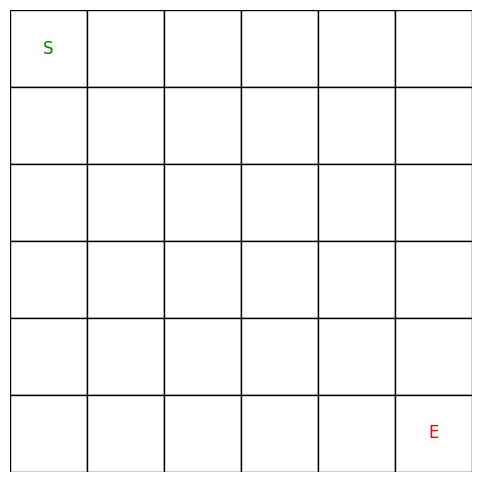

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Define movement directions
DIRECTIONS = {
    'right': (0, 1, '→'),
    'down': (1, 0, '↓'),
    'left': (0, -1, '←'),
    'up': (-1, 0, '↑')
}

def generate_random_path(n):
    """Generates a randomized path from the top-left to the bottom-right of an n x n grid."""
    while True:
        grid = [[None for _ in range(n)] for _ in range(n)]  # Empty grid
        x, y = 0, 0  # Start at the top-left corner
        grid[x][y] = 'start'
        path_directions = []  # Store directions for printing
        direction_map = {}  # Map for visualization arrows

        while (x, y) != (n - 1, n - 1):
            valid_moves = []
            for direction, (dx, dy, arrow) in DIRECTIONS.items():
                nx, ny = x + dx, y + dy
                if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] is None:
                    valid_moves.append((direction, nx, ny, arrow))

            if not valid_moves:
                break  # If stuck, restart path generation

            # Randomly select a valid move
            direction, x_next, y_next, arrow = random.choice(valid_moves)
            path_directions.append(direction)  # Store direction for printing
            direction_map[(x, y)] = arrow  # Record arrow for visualization
            x, y = x_next, y_next
            grid[x][y] = 'path'

        # Check if the path reached the target
        if (x, y) == (n - 1, n - 1):
            grid[n - 1][n - 1] = 'end'  # Mark the bottom-right as the end
            return grid, direction_map, path_directions

def visualize_random_path(grid, direction_map):
    """Visualizes a grid with a randomized path and directions using matplotlib."""
    n = len(grid)
    fig, ax = plt.subplots(figsize=(n, n))
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)

    for y in range(n):
        for x in range(n):
            cell = grid[y][x]
            rect = patches.Rectangle((x, n - y - 1), 1, 1, edgecolor='black', facecolor='white')
            ax.add_patch(rect)

            cx, cy = x + 0.5, n - y - 0.5
            if cell == 'start':
                ax.text(cx, cy, 'S', color='green', ha='center', va='center', fontsize=12)
            elif cell == 'end':
                ax.text(cx, cy, 'E', color='red', ha='center', va='center', fontsize=12)
            elif cell == 'path' and (x, y) in direction_map:
                arrow = direction_map[(x, y)]
                ax.text(cx, cy, arrow, color='blue', ha='center', va='center', fontsize=12)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Tile map for transitions
tiles_map = {("right", "right"): 5,
             ("right", "down"): 3,
             ("right", "up"): 9,
             ("down", "right"): 12,
             ("down", "down"): 10,
             ("down", "left"): 9,
             ("left", "down"): 6,
             ("left", "left"): 5,
             ("left", "up"): 12,
             ("up", "right"): 6,
             ("up", "left"): 3,
             ("up", "up"): 10,
             ("left", "right"): 5,
             ("down", "up"): 10,
             ("right", "left"): 5,
             ("up", "down"): 10}

# Function to generate grid based on directions
def generate_grid_from_path(path_directions, grid_size=6):
    """Generates a grid with tiles based on the path directions."""
    init_pos = (0, 0)
    grid = [[0 for _ in range(grid_size)] for _ in range(grid_size)]  # Initialize an empty grid

    # Add tiles based on path directions
    for i in range(1, len(path_directions)):
        prev_dir = path_directions[i-1]
        curr_dir = path_directions[i]
        grid[init_pos[0]][init_pos[1]] = tiles_map[(prev_dir, curr_dir)]

        if curr_dir == "right":
            init_pos = (init_pos[0], init_pos[1] + 1)
        elif curr_dir == "down":
            init_pos = (init_pos[0] + 1, init_pos[1])
        elif curr_dir == "left":
            init_pos = (init_pos[0], init_pos[1] - 1)
        elif curr_dir == "up":
            init_pos = (init_pos[0] - 1, init_pos[1])

    return grid

# Example usage
n = 6
grid, direction_map, path_directions = generate_random_path(n)

# Insert left at the start and right at the end of the path directions
path_directions.insert(0, "left")
path_directions.append("right")

# Generate grid from the path directions
grid_from_path = generate_grid_from_path(path_directions, grid_size=n)

# Print the generated grid
print("Generated Grid:")
for row in grid_from_path:
    print(row)

# Visualize the generated grid
visualize_random_path(grid, direction_map)


In [29]:
import pygame
import random

# Initialize Pygame
pygame.init()

# Define movement directions
DIRECTIONS = {
    'right': (0, 1, '→'),
    'down': (1, 0, '↓'),
    'left': (0, -1, '←'),
    'up': (-1, 0, '↑')
}

# Tile map for transitions (for demonstration)
tiles_map = {("right", "right"): 5,
             ("right", "down"): 3,
             ("right", "up"): 9,
             ("down", "right"): 12,
             ("down", "down"): 10,
             ("down", "left"): 9,
             ("left", "down"): 6,
             ("left", "left"): 5,
             ("left", "up"): 12,
             ("up", "right"): 6,
             ("up", "left"): 3,
             ("up", "up"): 10,
             ("left", "right"): 5,
             ("down", "up"): 10,
             ("right", "left"): 5,
             ("up", "down"): 10}

def generate_random_path(n):
    """Generates a randomized path from the top-left to the bottom-right of an n x n grid."""
    while True:
        grid = [[None for _ in range(n)] for _ in range(n)]  # Empty grid
        x, y = 0, 0  # Start at the top-left corner
        grid[x][y] = 'start'
        path_directions = []  # Store directions for printing
        direction_map = {}  # Map for visualization arrows

        while (x, y) != (n - 1, n - 1):
            valid_moves = []
            for direction, (dx, dy, arrow) in DIRECTIONS.items():
                nx, ny = x + dx, y + dy
                if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] is None:
                    valid_moves.append((direction, nx, ny, arrow))

            if not valid_moves:
                break  # If stuck, restart path generation

            # Randomly select a valid move
            direction, x_next, y_next, arrow = random.choice(valid_moves)
            path_directions.append(direction)  # Store direction for printing
            direction_map[(x, y)] = arrow  # Record arrow for visualization
            x, y = x_next, y_next
            grid[x][y] = 'path'

        # Check if the path reached the target
        if (x, y) == (n - 1, n - 1):
            grid[n - 1][n - 1] = 'end'  # Mark the bottom-right as the end
            return grid, direction_map, path_directions


# Function to generate grid based on directions
def generate_grid_from_path(path_directions, grid_size=6):
    """Generates a grid with tiles based on the path directions."""
    init_pos = (0, 0)
    grid = [[0 for _ in range(grid_size)] for _ in range(grid_size)]  # Initialize an empty grid

    # Add tiles based on path directions
    for i in range(1, len(path_directions)):
        prev_dir = path_directions[i-1]
        curr_dir = path_directions[i]
        grid[init_pos[0]][init_pos[1]] = tiles_map[(prev_dir, curr_dir)]

        if curr_dir == "right":
            init_pos = (init_pos[0], init_pos[1] + 1)
        elif curr_dir == "down":
            init_pos = (init_pos[0] + 1, init_pos[1])
        elif curr_dir == "left":
            init_pos = (init_pos[0], init_pos[1] - 1)
        elif curr_dir == "up":
            init_pos = (init_pos[0] - 1, init_pos[1])

    return grid

# Load images for each tile number (ensure you have these images in your directory)
image_dict = {
    5: pygame.image.load('tiles/5.png'),  # Replace with actual image file paths
    3: pygame.image.load('tiles/3.png'),
    9: pygame.image.load('tiles/9.png'),
    12: pygame.image.load('tiles/12.png'),
    10: pygame.image.load('tiles/10.png'),
    6: pygame.image.load('tiles/6.png')
}

# Function to display grid using pygame
def display_grid_with_images(grid, tile_size=50):
    """Displays the grid using images in pygame."""
    # Define screen dimensions based on grid size and tile size
    grid_size = len(grid)
    screen_width = screen_height = grid_size * tile_size
    screen = pygame.display.set_mode((screen_width, screen_height))
    pygame.display.set_caption("Grid Visualization")

    # Fill the screen with a white background
    screen.fill((255, 255, 255))

    # Loop through the grid and draw the corresponding images
    for y in range(grid_size):
        for x in range(grid_size):
            tile_value = grid[y][x]
            # Get the corresponding image for the tile value
            if tile_value in image_dict:
                tile_image = image_dict[tile_value]
                # Scale the image to fit the tile size
                tile_image = pygame.transform.scale(tile_image, (tile_size, tile_size))
                # Draw the image at the appropriate location
                screen.blit(tile_image, (x * tile_size, y * tile_size))

    # Update the display
    pygame.display.flip()

# Example usage
n = 6
grid, direction_map, path_directions = generate_random_path(n)
print(path_directions)

# Generate grid from path directions
grid_from_path = generate_grid_from_path(path_directions, grid_size=n)

# Display the grid with images using pygame
display_grid_with_images(grid_from_path, tile_size=50)

# Run the pygame event loop to keep the window open
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

# Quit pygame
pygame.quit()


['down', 'down', 'down', 'down', 'right', 'up', 'right', 'up', 'up', 'left', 'up', 'right', 'right', 'right', 'down', 'right', 'down', 'left', 'down', 'right', 'down', 'down']


In [30]:
import pygame
import random

# Initialize Pygame
pygame.init()

# Define movement directions
DIRECTIONS = {
    'right': (0, 1, '→'),
    'down': (1, 0, '↓'),
    'left': (0, -1, '←'),
    'up': (-1, 0, '↑')
}

# Tile map for transitions (for demonstration)
tiles_map = {("right", "right"): 5,
             ("right", "down"): 3,
             ("right", "up"): 9,
             ("down", "right"): 12,
             ("down", "down"): 10,
             ("down", "left"): 9,
             ("left", "down"): 6,
             ("left", "left"): 5,
             ("left", "up"): 12,
             ("up", "right"): 6,
             ("up", "left"): 3,
             ("up", "up"): 10,
             ("left", "right"): 5,
             ("down", "up"): 10,
             ("right", "left"): 5,
             ("up", "down"): 10}

def generate_random_path(n):
    """Generates a randomized path from the top-left to the bottom-right of an n x n grid."""
    while True:
        grid = [[None for _ in range(n)] for _ in range(n)]  # Empty grid
        x, y = 0, 0  # Start at the top-left corner
        grid[x][y] = 'start'
        path_directions = []  # Store directions for printing
        direction_map = {}  # Map for visualization arrows

        while (x, y) != (n - 1, n - 1):
            valid_moves = []
            for direction, (dx, dy, arrow) in DIRECTIONS.items():
                nx, ny = x + dx, y + dy
                if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] is None:
                    valid_moves.append((direction, nx, ny, arrow))

            if not valid_moves:
                break  # If stuck, restart path generation

            # Randomly select a valid move
            direction, x_next, y_next, arrow = random.choice(valid_moves)
            path_directions.append(direction)  # Store direction for printing
            direction_map[(x, y)] = arrow  # Record arrow for visualization
            x, y = x_next, y_next
            grid[x][y] = 'path'

        # Check if the path reached the target
        if (x, y) == (n - 1, n - 1):
            grid[n - 1][n - 1] = 'end'  # Mark the bottom-right as the end
            return grid, direction_map, path_directions


# Function to generate grid based on directions
def generate_grid_from_path(path_directions, grid_size=6):
    """Generates a grid with tiles based on the path directions."""
    init_pos = (0, 0)
    grid = [[0 for _ in range(grid_size)] for _ in range(grid_size)]  # Initialize an empty grid

    # Add tiles based on path directions
    for i in range(1, len(path_directions)):
        prev_dir = path_directions[i-1]
        curr_dir = path_directions[i]
        grid[init_pos[0]][init_pos[1]] = tiles_map[(prev_dir, curr_dir)]

        if curr_dir == "right":
            init_pos = (init_pos[0], init_pos[1] + 1)
        elif curr_dir == "down":
            init_pos = (init_pos[0] + 1, init_pos[1])
        elif curr_dir == "left":
            init_pos = (init_pos[0], init_pos[1] - 1)
        elif curr_dir == "up":
            init_pos = (init_pos[0] - 1, init_pos[1])

    return grid

# Load images for each tile number (ensure you have these images in your directory)
image_dict = {
    5: pygame.image.load('tiles/5.png'),  # Replace with actual image file paths
    3: pygame.image.load('tiles/3.png'),
    9: pygame.image.load('tiles/9.png'),
    12: pygame.image.load('tiles/12.png'),
    10: pygame.image.load('tiles/10.png'),
    6: pygame.image.load('tiles/6.png')
}

# Function to display grid using pygame
def display_grid_with_images(grid, tile_size=50):
    """Displays the grid using images in pygame and draws grid lines."""
    # Define screen dimensions based on grid size and tile size
    grid_size = len(grid)
    screen_width = screen_height = grid_size * tile_size
    screen = pygame.display.set_mode((screen_width, screen_height))
    pygame.display.set_caption("Grid Visualization")

    # Fill the screen with a white background
    screen.fill((255, 255, 255))

    # Loop through the grid and draw the corresponding images
    for y in range(grid_size):
        for x in range(grid_size):
            tile_value = grid[y][x]
            # Get the corresponding image for the tile value
            if tile_value in image_dict:
                tile_image = image_dict[tile_value]
                # Scale the image to fit the tile size
                tile_image = pygame.transform.scale(tile_image, (tile_size, tile_size))
                # Draw the image at the appropriate location
                screen.blit(tile_image, (x * tile_size, y * tile_size))
                
                # Draw grid lines (borders of the cells)
                pygame.draw.rect(screen, (0, 0, 0), (x * tile_size, y * tile_size, tile_size, tile_size), 2)

    # Update the display
    pygame.display.flip()

# Example usage
n = 6
grid, direction_map, path_directions = generate_random_path(n)
print(path_directions)

# Generate grid from path directions
grid_from_path = generate_grid_from_path(path_directions, grid_size=n)

# Display the grid with images and grid lines using pygame
display_grid_with_images(grid_from_path, tile_size=50)

# Run the pygame event loop to keep the window open
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

# Quit pygame
pygame.quit()


['right', 'down', 'down', 'right', 'up', 'up', 'right', 'down', 'down', 'right', 'down', 'left', 'down', 'left', 'left', 'up', 'left', 'down', 'down', 'right', 'right', 'right', 'right', 'right']


In [1]:
import pygame
import random

# Initialize Pygame
pygame.init()

# Define movement directions
DIRECTIONS = {
    'right': (0, 1, '→'),
    'down': (1, 0, '↓'),
    'left': (0, -1, '←'),
    'up': (-1, 0, '↑')
}

# Tile map for transitions (for demonstration)
tiles_map = {("right", "right"): 5,
             ("right", "down"): 3,
             ("right", "up"): 9,
             ("down", "right"): 12,
             ("down", "down"): 10,
             ("down", "left"): 9,
             ("left", "down"): 6,
             ("left", "left"): 5,
             ("left", "up"): 12,
             ("up", "right"): 6,
             ("up", "left"): 3,
             ("up", "up"): 10,
             ("left", "right"): 5,
             ("down", "up"): 10,
             ("right", "left"): 5,
             ("up", "down"): 10}

def generate_random_path(n):
    """Generates a randomized path from the top-left to the bottom-right of an n x n grid."""
    while True:
        grid = [['empty' for _ in range(n)] for _ in range(n)]  # Empty grid initialized to 'empty'
        x, y = 0, 0  # Start at the top-left corner
        grid[x][y] = 'start'
       # grid[n - 1][n - 1] = 'end'  # Mark the bottom-right as the end
        path_directions = []  # Store directions for printing
        direction_map = {}  # Map for visualization arrows

        while (x, y) != (n - 1, n - 1):
            valid_moves = []
            for direction, (dx, dy, arrow) in DIRECTIONS.items():
                nx, ny = x + dx, y + dy
                # Check for boundaries
                if 0 <= nx < n and 0 <= ny < n and grid[nx][ny] == 'empty':
                    valid_moves.append((direction, nx, ny, arrow))

            if not valid_moves:
                break  # If stuck, restart path generation

            # Randomly select a valid move
            direction, x_next, y_next, arrow = random.choice(valid_moves)
            path_directions.append(direction)  # Store direction for printing
            direction_map[(x, y)] = arrow  # Record arrow for visualization
            x, y = x_next, y_next
            grid[x][y] = 'path'

        # Check if the path reached the target
        if (x, y) == (n - 1, n - 1):
            grid[n - 1][n - 1] = 'end'  # Mark the bottom-right as the end
            return grid, direction_map, path_directions


# Function to generate grid based on directions
def generate_grid_from_path(path_directions, grid_size=6):
    """Generates a grid with tiles based on the path directions."""
    init_pos = (0, 0)
    grid = [['empty' for _ in range(grid_size)] for _ in range(grid_size)]  # Initialize an empty grid

    # Add tiles based on path directions
    for i in range(1, len(path_directions)):
        prev_dir = path_directions[i-1]
        curr_dir = path_directions[i]
        grid[init_pos[0]][init_pos[1]] = tiles_map[(prev_dir, curr_dir)]

        if curr_dir == "right":
            init_pos = (init_pos[0], init_pos[1] + 1)
        elif curr_dir == "down":
            init_pos = (init_pos[0] + 1, init_pos[1])
        elif curr_dir == "left":
            init_pos = (init_pos[0], init_pos[1] - 1)
        elif curr_dir == "up":
            init_pos = (init_pos[0] - 1, init_pos[1])

    return grid

# Load images for each tile number (ensure you have these images in your directory)
image_dict = {
    5: pygame.image.load('tiles/5.png'),  # Replace with actual image file paths
    3: pygame.image.load('tiles/3.png'),
    9: pygame.image.load('tiles/9.png'),
    12: pygame.image.load('tiles/12.png'),
    10: pygame.image.load('tiles/10.png'),
    6: pygame.image.load('tiles/6.png'),
    'empty': pygame.image.load('tiles/0.png')  # Empty cell image
}

# Function to display grid using pygame
def display_grid_with_images(grid, tile_size=50):
    """Displays the grid using images in pygame and draws grid lines."""
    # Define screen dimensions based on grid size and tile size
    grid_size = len(grid)
    screen_width = screen_height = grid_size * tile_size
    screen = pygame.display.set_mode((screen_width, screen_height))
    pygame.display.set_caption("Grid Visualization")

    # Fill the screen with a white background
    screen.fill((255, 255, 255))

    # Loop through the grid and draw the corresponding images
    for y in range(grid_size):
        for x in range(grid_size):
            tile_value = grid[y][x]
            # Get the corresponding image for the tile value
            if tile_value in image_dict:
                tile_image = image_dict[tile_value]
                # Scale the image to fit the tile size
                tile_image = pygame.transform.scale(tile_image, (tile_size, tile_size))
                # Draw the image at the appropriate location
                screen.blit(tile_image, (x * tile_size, y * tile_size))
                
                # Draw grid lines (borders of the cells)
                pygame.draw.rect(screen, (0, 0, 0), (x * tile_size, y * tile_size, tile_size, tile_size), 2)

    # Update the display
    pygame.display.flip()

# Example usage
n = 6
grid, direction_map, path_directions = generate_random_path(n)
path_directions.insert(0, "right")
path_directions.append("right")
print(path_directions)

# Generate grid from path directions
grid_from_path = generate_grid_from_path(path_directions, grid_size=n)

# Display the grid with images and grid lines using pygame
display_grid_with_images(grid_from_path, tile_size=50)

# Run the pygame event loop to keep the window open
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

# Quit pygame
pygame.quit()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.9)
Hello from the pygame community. https://www.pygame.org/contribute.html
['right', 'down', 'right', 'up', 'right', 'right', 'right', 'right', 'down', 'down', 'down', 'down', 'left', 'up', 'left', 'left', 'left', 'down', 'right', 'right', 'down', 'right', 'right', 'right']
